<a href="https://colab.research.google.com/github/anunuclse/Final_tesk_DE_step12/blob/main/Final_tesk_DE_step12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import files
import csv
import urllib.request
import io
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import pandas as pd

In [13]:
def generate_random_date(start_date, end_date):
    """Генерирует случайную дату между start_date и end_date."""
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return start_date + timedelta(days=random_days)

def generate_data(num_entries, seed=42):
    """Генерирует случайные данные для num_entries строк с фиксированным seed."""
    random.seed(seed)  # Устанавливаем фиксированное значение для генератора случайных чисел
    products = ["яблоки", "груши", "сливы", "печенье", "конфеты Рот-Фронт"]
    start_date = datetime.strptime("2024-06-01", "%Y-%m-%d")
    end_date = datetime.strptime("2024-06-30", "%Y-%m-%d")

    data = [["product_name", "quantity", "price", "date"]]  # Заголовки
    for _ in range(num_entries):
        product_name = random.choice(products)
        quantity = random.randint(1, 20)
        price = random.randint(10, 30)
        date = generate_random_date(start_date, end_date).strftime("%Y-%m-%d")
        data.append([product_name, quantity, price, date])

    return data

# Генерация 100 строк данных
data = generate_data(100)

# Запись данных в CSV файл
with open('generated_data.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)

# Создание ссылки для скачивания файла
files.download('generated_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
FILE_PATH = "https://raw.githubusercontent.com/anunuclse/Final_tesk_DE_step12/main/generated_data.csv"

In [51]:
# принимает путь к файлу и возвращает список продаж.
# Продажи в свою очередь являются словарями с ключами product_name, quantity, price, date (название, количество, цена, дата).

def read_sales_data(file_path):
    # Загружаем CSV файл по URL
    response = urllib.request.urlopen(url)
    csv_data = response.read().decode('utf-8')

    # Используем io.StringIO для чтения данных из строки
    csvfile = io.StringIO(csv_data)
    sales_list = []

    # Чтение данных из CSV
    reader = csv.DictReader(csvfile)
    for row in reader:
        sales_list.append(row)

    return sales_list

In [52]:
#принимает список продаж и возвращает словарь, где ключ - название продукта, а значение - общая сумма продаж этого продукта.

def total_sales_per_product(sales_data):
    # Инициализация словаря для хранения сумм продаж по продуктам
    sales_summary_products = {}

    # Проход по списку продаж
    for sale in sales_data:
        product_name = sale['product_name']
        quantity = int(sale['quantity'])  # Преобразуем в целое число
        price = float(sale['price'])      # Преобразуем в число с плавающей точкой

        # Вычисление общей суммы для данного продукта
        total_sale = quantity * price

        # Обновление сумм в словаре
        if product_name in sales_summary_products:
            sales_summary_products[product_name] += total_sale
        else:
            sales_summary_products[product_name] = total_sale

    return sales_summary_products

In [67]:
# принимает список продаж и возвращает словарь, где ключ - дата, а значение общая сумма продаж за эту дату.

def sales_over_time(sales_data):
    # Инициализация словаря для хранения сумм продаж по датам
    sales_summary_dates = {}

    # Проход по списку продаж
    for sale in sales_data:
        product_name = sale['date']
        quantity = int(sale['quantity'])  # Преобразуем в целое число
        price = float(sale['price'])      # Преобразуем в число с плавающей точкой

        # Вычисление общей суммы для данного продукта
        total_sale = quantity * price

        # Обновление сумм в словаре
        if product_name in sales_summary_dates:
            sales_summary_dates[product_name] += total_sale
        else:
            sales_summary_dates[product_name] = total_sale

    return sales_summary_dates

In [68]:
def find_top_product_and_date(total_sales_per_product, sales_over_time):
    # Находим продукт с наибольшей выручкой
    top_product = max(total_sales_per_product, key=total_sales_per_product.get)
    top_revenue = total_sales_per_product[top_product]

    # Находим день с наибольшей суммой продаж
    top_day = max(sales_over_time, key=sales_over_time.get)
    top_sales = sales_over_time[top_day]

    print(f"Продукт, принесший наибольшую выручку: \"{top_product}\" с суммой продаж {top_revenue:.2f}")
    print(f"День, когда была наибольшая выручка: \"{top_day}\" с суммой продаж {top_sales:.2f}")

In [77]:
def plot_sales(sales_by_product, sales_by_date):
    # Сортировка данных по датам
    sorted_dates = sorted(sales_by_date.keys(), key=lambda x: datetime.strptime(x, '%Y-%m-%d'))
    sorted_sales_by_date = [sales_by_date[date] for date in sorted_dates]

    # Построение графика общей суммы продаж по продуктам
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1-я ячейка
    plt.bar(sales_by_product.keys(), sales_by_product.values(), color='skyblue')
    plt.xlabel('Продукт')
    plt.ylabel('Общая сумма продаж')
    plt.title('Общая сумма продаж по продуктам')
    plt.xticks(rotation=45, ha='right')

    # Построение графика общей суммы продаж по дням
    plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2-я ячейка
    plt.plot(sorted_dates, sorted_sales_by_date, marker='o', linestyle='-', color='orange')
    plt.xlabel('Дата')
    plt.ylabel('Общая сумма продаж')
    plt.title('Общая сумма продаж по дням')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

Продукт, принесший наибольшую выручку: "груши" с суммой продаж 5178.00
День, когда была наибольшая выручка: "2024-06-03" с суммой продаж 1358.00


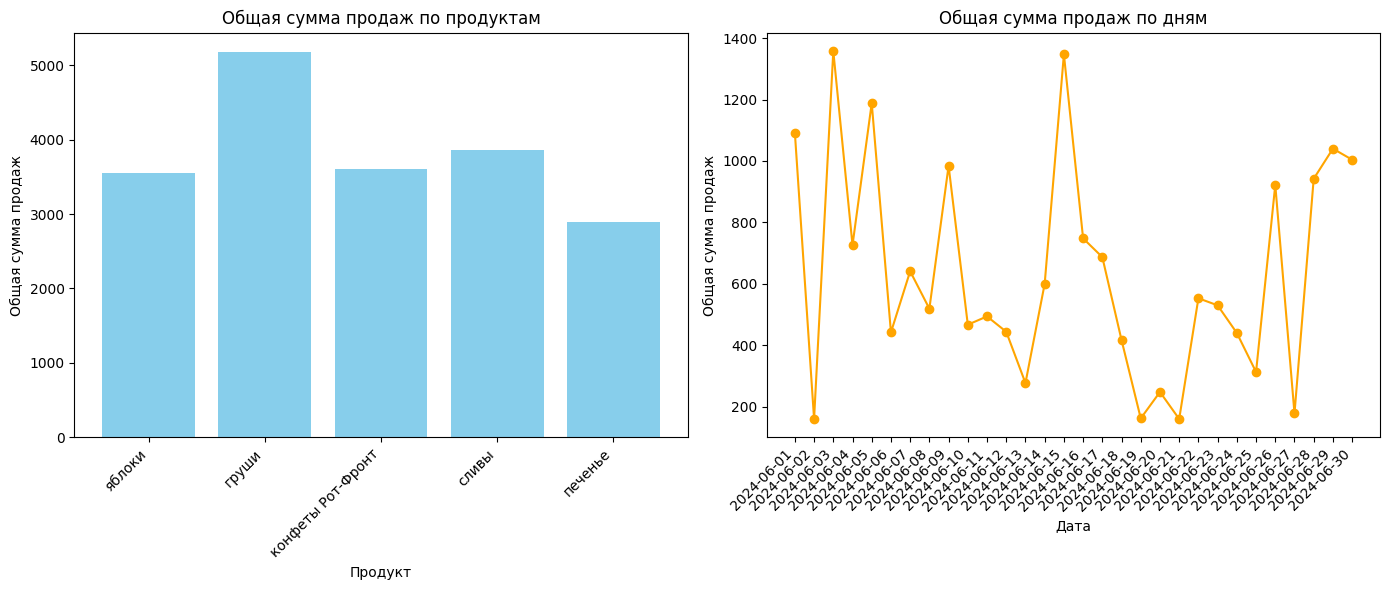

In [78]:
# Чтение данных
sales_data = read_sales_data(FILE_PATH)

# Подсчет выручки по продуктам и датам
sales_products = total_sales_per_product(sales_data)
sales_dates = sales_over_time(sales_data)  # Используйте функцию sales_over_time

# Вызов функции для нахождения продукта с наибольшей выручкой и дня с наибольшими продажами
find_top_product_and_date(sales_products, sales_dates)

# Построение графиков
plot_sales(sales_products, sales_dates)